In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models

from imutils import paths
from pathlib import Path
import os, sys
import time
import copy

import pandas as pd
import hvplot.pandas
import matplotlib.pylab as plt
import numpy as np

# Local modules

from cub_tools.train import train_model
from cub_tools.visualize import imshow, visualize_model
from cub_tools.transforms import resizeCropTransforms

C:\Users\Ed.Morris\AppData\Local\Continuum\anaconda3\envs\py37_pytorch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# Script runtime options
root_dir = '../data'
data_dir = os.path.join(root_dir,'images')

batch_size=16
nrows_plot=4

In [3]:
data_transforms = resizeCropTransforms(img_resize=256, img_crop_size=224)

In [4]:
# Setup data loaders with augmentation transforms
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes

In [5]:
image_datasets['train']

Dataset ImageFolder
    Number of datapoints: 5994
    Root location: ../data\images\train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

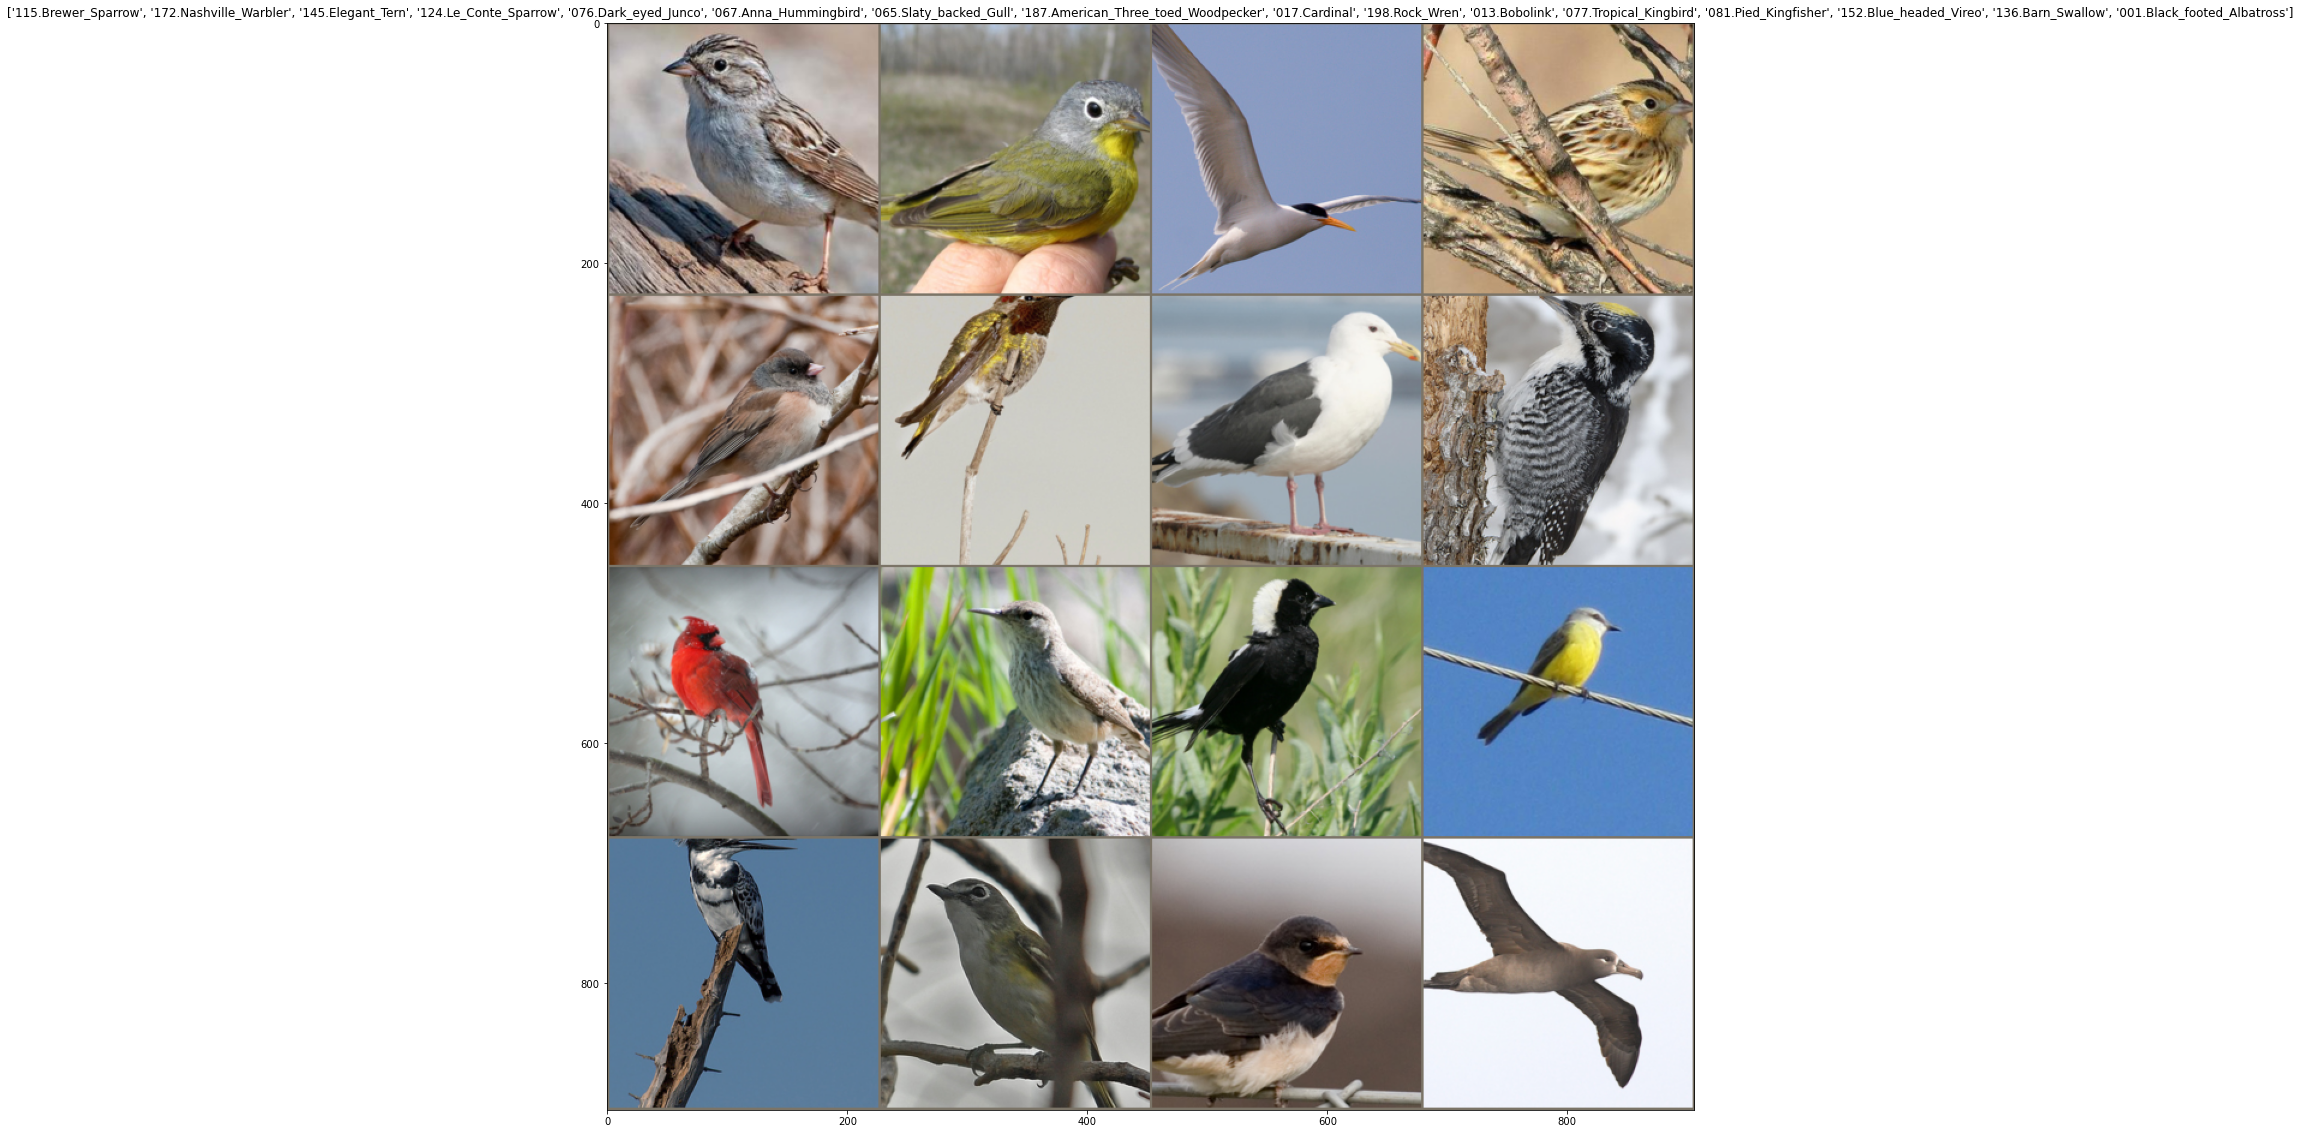

In [6]:
# Check the augmentations
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs, nrow=nrows_plot)

imshow(out, title=[class_names[x] for x in classes], figsize=(20,20))

In [7]:
class_sampling = {'train' : {}, 'test' : {}}
for stage in ['train','test']:
    for i_class, class_name in enumerate(class_names):
        class_sampling[stage][class_name] = (np.array(image_datasets['test'].targets) == i_class).sum()

In [8]:
pd.DataFrame(class_sampling)['train'].sort_values(ascending=False).hvplot.bar(stacked=False, rot=90, frame_width=1600, frame_height=400)

:Bars   [index]   (train)

In [9]:
pd.DataFrame(class_sampling)['test'].sort_values(ascending=False).hvplot.bar(stacked=False, rot=90, frame_width=1600, frame_height=400)

:Bars   [index]   (test)